In [101]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [103]:
df=pd.read_csv("autism_VF.csv")

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,18 and more,?,NO


In [105]:
x=df.drop(['Class/ASD'],axis=1)
y=df['Class/ASD']

In [107]:
# Diviser les données en ensembles d’entraînement et de test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [109]:

from sklearn.preprocessing import LabelEncoder


x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)

# Aligner les colonnes de X_test avec celles de X_train:car pour  données catégorielles, certaines colonnes existeent dans  (x_train_encoded)mais pas dans xtest
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

# Afficher les résultats après encodage
print("x_train encodé:")
print(x_train_encoded.head())  

print("\nx_test encodé:")
print(x_test_encoded.head()) 

# Encoder la variable cible y
label_encoder = LabelEncoder()

# Encodeage  de y_train et y_test 
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Afficher les résultats après encodage
print("\ny_train encodé:")
print(y_train_encoded[:5])  #  5 premières valeurs de y_train encodé

print("\ny_test encodé:")
print(y_test_encoded[:5])  #  5 premières valeurs de y_test encodé

x_train encodé:
     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
165         1         0         0         0         1         0         1   
543         1         0         1         1         1         1         1   
284         0         0         0         0         0         0         0   
361         0         1         0         1         0         0         0   
110         1         0         0         0         1         0         0   

     A8_Score  A9_Score  A10_Score  ...  contry_of_res_Viet Nam  \
165         1         0          0  ...                   False   
543         0         0          1  ...                   False   
284         0         0          0  ...                   False   
361         0         0          0  ...                   False   
110         0         0          1  ...                   False   

     used_app_before_no  used_app_before_yes  age_desc_18 and more  \
165                True                False    

In [111]:
from sklearn.preprocessing import StandardScaler
# Initialiser le StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)  
x_test_scaled = scaler.transform(x_test_encoded)


In [113]:
#optimisons les performance de knn 
# Initialisation KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
knn = KNeighborsClassifier()

# Définir la grille des paramètres pour le GridSearch
parametre_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'metric': ['euclidean', 'manhattan']  # Type de métrique pour le calcul de la distance
}

# Initialiser le GridSearchCV avec StratifiedKFold (pour gérer les classes déséquilibrées) il conservela distribution proportionnelle des classes dans chaque pli
grid_search = GridSearchCV(knn, parametre_grid, cv=StratifiedKFold(n_splits=5), scoring='f1')# il vaut mieux moyenne harmonique de la précision et du rappel

# gridsearch  
grid_search.fit(x_train_scaled, y_train_encoded)

# Afficher les meilleurs paramètres trouvés par le GridSearch
print("Meilleurs paramètres :", grid_search.best_params_)


Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 9}


In [115]:
# Entraîner le modèle avec les meilleurs paramètres

best_knn = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
best_knn.fit(x_train_scaled, y_train_encoded)

# Évaluer sur l'ensemble de test
y_pred = best_knn.predict(x_test_scaled)

#  les résultats de la classification
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test_encoded, y_pred))
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy : {accuracy}")


              precision    recall  f1-score   support

           0       0.86      0.95      0.90        91
           1       0.88      0.72      0.79        50

    accuracy                           0.87       141
   macro avg       0.87      0.83      0.85       141
weighted avg       0.87      0.87      0.86       141

Accuracy : 0.8652482269503546


In [ ]:
#rappel=vp/vp+fn

[[86  5]
 [14 36]]


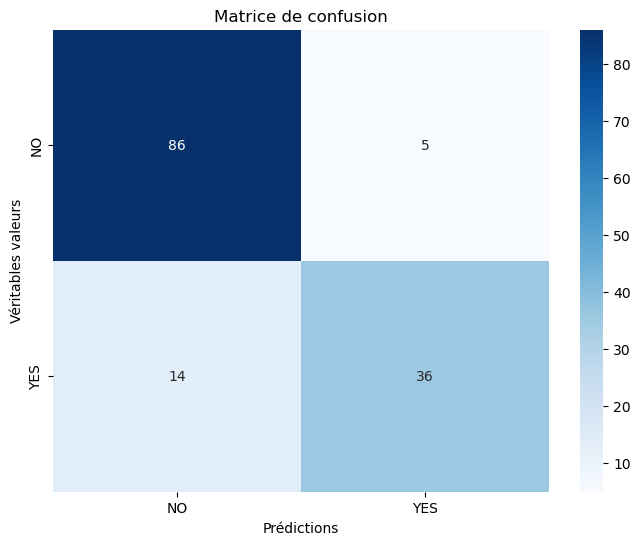

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  la matrice de confusion
cm = confusion_matrix(y_test_encoded, y_pred)
print(cm)

# Afficher cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables valeurs')
plt.show()


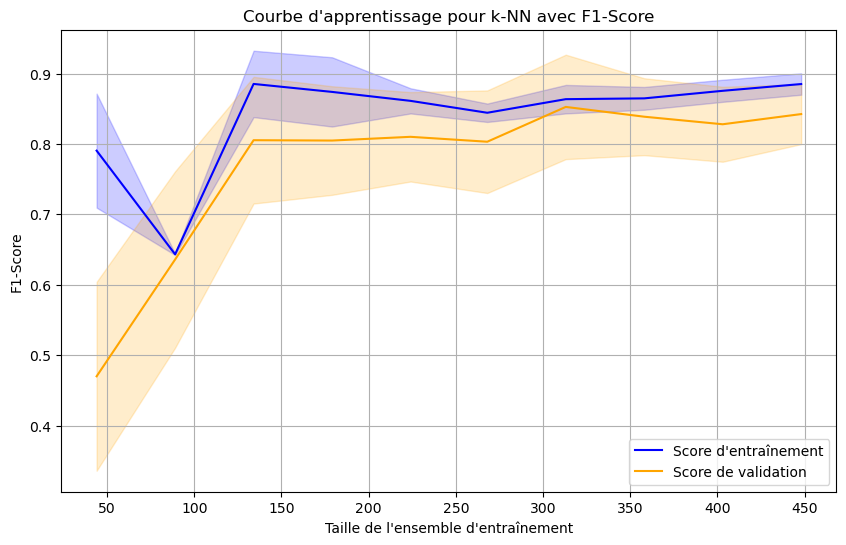

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

# Définir le modèle avec les meilleurs hyperparamètres
knn = KNeighborsClassifier(n_neighbors=9, metric='manhattan') 

# Obtenir les scores d'apprentissage
train_sizes, train_scores, val_scores = learning_curve(
    knn, 
   x_train_scaled,  
    y_train_encoded,  
    cv=5,                 # 5-fold cross-validation
    scoring='f1',         
    train_sizes=np.linspace(0.1, 1.0, 10),  # Tailles d'échantillons croissantes
    n_jobs=-1             #  on va Utiliser tous les cœurs disponibles pour accélérer
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Tracer les courbes
plt.figure(figsize=(10, 6))

# Courbe de score d'entraînement
plt.plot(train_sizes, train_mean, label="Score d'entraînement", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

# Courbe de score de validation
plt.plot(train_sizes, val_mean, label="Score de validation", color="orange")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2)


plt.title("Courbe d'apprentissage pour k-NN avec F1-Score")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("F1-Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [125]:
print("Dimensions de x_scaled : ", x_train_scaled.shape)
print("Dimensions de y : ", y.shape)
print("Dimensions de x_train : ", x_train_scaled.shape)
print("Dimensions de x_test : ", x_test_scaled.shape)
print("Dimensions de y_train : ", y_train.shape)
print("Dimensions de y_test : ", y_test.shape)

Dimensions de x_scaled :  (561, 98)
Dimensions de y :  (702,)
Dimensions de x_train :  (561, 98)
Dimensions de x_test :  (141, 98)
Dimensions de y_train :  (561,)
Dimensions de y_test :  (141,)
